In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) 

In [2]:
# download_data.py
from pandas import read_table

def download_data(fileLocation, fields):
    '''
    Downloads the data for this script into a pandas DataFrame. Uses columns indices provided
    '''

    frame = read_table(
        fileLocation,
        
        # Specify the file encoding
        # Latin-1 is common for data from US sources
        encoding='latin-1',
        #encoding='utf-8',  # UTF-8 is also common

        # Specify the separator in the data
        sep=',',            # comma separated values

        # Ignore spaces after the separator
        skipinitialspace=True,

        # Generate row labels from each row number
        index_col=None,

        # Generate column headers row from each column number
        header=0,          # use the first line as headers

        usecols=fields
    )

    # Return the entire frame
    return frame

In [3]:
# Normalization.py

def rescaleNormalization(dataArray):
    min = dataArray.min()
    denom = dataArray.max() - min
    newValues = []
    for x in dataArray:
        newX = (x - min) / denom
        newValues.append(newX)
    return newValues

def rescaleMatrix(dataMatrix):
    colCount = len(dataMatrix[0])
    rowCount = len(dataMatrix)
    newMatrix = np.zeros(dataMatrix.shape) 
    for i in range(0, colCount):
        min = dataMatrix[:,i].min()
        denom = dataMatrix[:,i].max() - min
        for k in range(0, rowCount):
            newX = (dataMatrix[k,i] - min) / denom
            newMatrix[k,i] = newX
    return newMatrix


def meanNormalization(dataArray):
    mean = np.mean(dataArray)
    denom = dataArray.max() - dataArray.min()
    newValues = []
    for x in dataArray:
        newX = (x - mean) / denom
        newValues.append(newX)
    return newValues


In [4]:
# Starting codes for ha3 of CS596.
#NOTICE: Fill in the codes between "%PLACEHOLDER#start" and "PLACEHOLDER#end"

# There are two PLACEHODERS IN THIS SCRIPT

# parameters

################PLACEHOLDER1 #start##########################
# test multiple learning rates and report their convergence curves. 
ALPHA = np.array([0.01,0.1,1]) # this the values we might test, actually we will use numbers of alpha and max_iter directly
# in the function because it is tiring to roll the page up to change values here.
MAX_ITER = np.array([50,100,200,500])
################PLACEHOLDER1 #end##########################

In [5]:
#% step-1: load data and divide it into two subsets, used for training and testing
sat = download_data('sat.csv', [1, 2, 4]).values # three columns: MATH SAT, VERB SAT, UNI. GPA  # convert frame to matrix

In [6]:
################PLACEHOLDER2 #start##########################
# Normalize data
sat_valid = rescaleMatrix(sat)
sat_01 = (sat - sat.min(axis = 0)) / (sat.max(axis = 0) - sat.min(axis = 0))# please replace this code with your own codes
sat_demean = (sat - sat.mean(axis = 0)) / (sat.max(axis = 0) - sat.min(axis = 0))
sat_z = np.divide(sat - sat.mean(axis = 0), sat.std(axis = 0))
################PLACEHOLDER2 #end##########################

In [58]:
print((sat_01 == sat_valid).all()) # validate my own code using rescaleMatrix

True


In [7]:
# training data;
satTrain = sat[0:60, :]
satTrain_01 = sat_01[0:60, :]
satTrain_demean = sat_demean[0:60, :]
satTrain_z = sat_z[0:60, :]
# testing data; 
satTest = sat[60:len(sat),:]
satTest_01 = sat_01[60:len(sat),:]
satTest_demean = sat_demean[60:len(sat),:]
satTest_z = sat_z[60:len(sat),:]

In [8]:
#% step-2: train a linear regression model using the Gradient Descent (GD) method
# ** theta and xValues have 3 columns since have 2 features: y = (theta * x^0) + (theta * x^1) + (theta * x^2)
theta = np.zeros(3) 

xValues = np.ones((60, 3))
xValues_01 = np.ones((60, 3))
xValues_demean = np.ones((60, 3))
xValues_z = np.ones((60, 3))

xValues[:, 1:3] = satTrain[:, 0:2]
xValues_01[:, 1:3] = satTrain_01[:, 0:2]
xValues_demean[:, 1:3] = satTrain_demean[:, 0:2]
xValues_z[:, 1:3] = satTrain_z[:, 0:2]

yValues = satTrain[:, 2]
yValues_01 = satTrain_01[:, 2]
yValues_demean = satTrain_demean[:, 2]
yValues_z = satTrain_z[:, 2]


In [9]:
# X          - single array/vector
# y          - single array/vector
# theta      - single array/vector
# alpha      - scalar
# iterations - scarlar

def gradientDescent(X, y, theta, alpha, numIterations):
    '''
    # This function returns a tuple (theta, Cost array)
    '''
    m = len(y)
    arrCost =[];
    transposedX = np.transpose(X) # transpose X into a vector  -> XColCount X m matrix
    for iteration in range(0, numIterations):
        ################PLACEHOLDER3 #start##########################
        #: write your codes to update theta, i.e., the parameters to estimate. 
	# Replace the following variables if needed
        yhat = np.dot(theta, transposedX)
        residualError = y - yhat
        gradient =  (-1) * np.sum(np.multiply(residualError, transposedX), axis = 1) / m
        change = [alpha * x for x in gradient]
        theta = theta - change  # or theta = theta - alpha * gradient
        ################PLACEHOLDER3 #end##########################

        ################PLACEHOLDER4 #start##########################
        # calculate the current cost with the new theta; 
        atmp = np.sum((y - np.dot(theta,transposedX))** 2) / (2 * m)   
        arrCost.append(atmp)
        # cost = (1 / m) * np.sum(residualError ** 2)
        ################PLACEHOLDER4 #end##########################

    return theta, arrCost


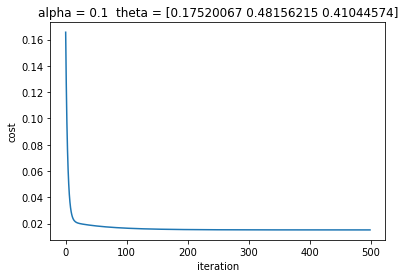

In [11]:
# call the GD algorithm, placeholders in the function gradientDescent()
theta = np.zeros(3)
[theta, arrCost] = gradientDescent(xValues_01, yValues_01, theta, 0.1, 500)
#visualize the convergence curve
plt.plot(range(0,len(arrCost)),arrCost);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}  theta = {}'.format(0.1, theta))
plt.savefig("N={}-alpha={}.jpg".format(500, 0.1))
plt.show()

In [12]:
#% step-3: testing
testXValues = np.ones((len(satTest), 3))
testXValues_01 = np.ones((len(satTest_01), 3)) 
testXValues_demean = np.ones((len(satTest_demean), 3)) 
testXValues_z = np.ones((len(satTest_z), 3))

testXValues[:, 1:3] = satTest[:, 0:2]
testXValues_01[:, 1:3] = satTest_01[:, 0:2]
testXValues_demean[:, 1:3] = satTest_demean[:, 0:2]
testXValues_z[:, 1:3] = satTest_z[:, 0:2]

tVal = testXValues.dot(theta)
tVal_01 =  testXValues_01.dot(theta)
tVal_demean =  testXValues_demean.dot(theta)
tVal_z =  testXValues_z.dot(theta)

In [13]:
#% step-4: evaluation
# calculate average error and standard deviation
tError = np.sqrt([x**2 for x in np.subtract(tVal, satTest[:, 2])])
tError_01 = np.sqrt([x**2 for x in np.subtract(tVal_01, satTest_01[:, 2])])
tError_demean = np.sqrt([x**2 for x in np.subtract(tVal_demean, satTest_demean[:, 2])])
tError_z = np.sqrt([x**2 for x in np.subtract(tVal_z, satTest_z[:, 2])])

print('results: {} ({})'.format(np.mean(tError), np.std(tError)))
print('results: {} ({})'.format(np.mean(tError_01), np.std(tError_01)))
print('results: {} ({})'.format(np.mean(tError_demean), np.std(tError_demean)))
print('results: {} ({})'.format(np.mean(tError_z), np.std(tError_z)))


results: 549.6715263867445 (46.968213118648634)
results: 0.1727749787556687 (0.1268844229789746)
results: 0.22732888827824418 (0.14422496812809363)
results: 0.6765757126398776 (0.4970486534047073)


In [14]:
# function for showing convergence curve of different parameters
def performance_parameter(x, y, a, n, testset):
    theta = np.zeros(3)
    [theta, arrCost] = gradientDescent(x, y, theta, a, n)
#visualize the convergence curve
    plt.plot(range(0,len(arrCost)),arrCost);
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.title('alpha = {}  theta = {}'.format(a, theta))
    plt.savefig("N={}-alpha={}.jpg".format(n, a))
    plt.show()
#test_error
    testXValues = np.ones((len(testset), 3))
    testXValues[:, 1:3] = testset[:, 0:2]
    tVal = testXValues.dot(theta)
    tError = np.sqrt([x**2 for x in np.subtract(tVal, testset[:, 2])])
    print('results: {} ({})'.format(np.mean(tError), np.std(tError)))
    
    

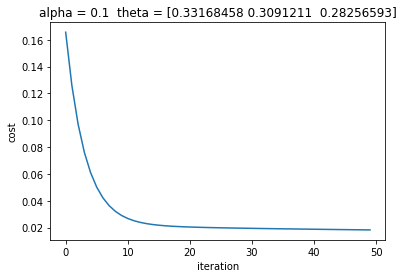

results: 0.14703223456661657 (0.11722180615926699)


In [104]:
# Testing N
performance_parameter(xValues_01,yValues_01, 0.1, 50, satTest_01)

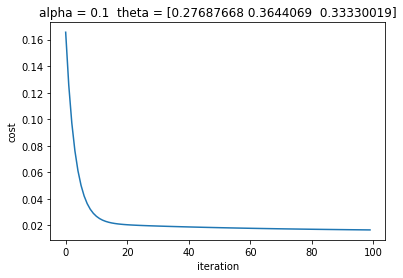

results: 0.14998750761105487 (0.1123017162709419)


In [102]:
performance_parameter(xValues_01,yValues_01, 0.1, 100, satTest_01)

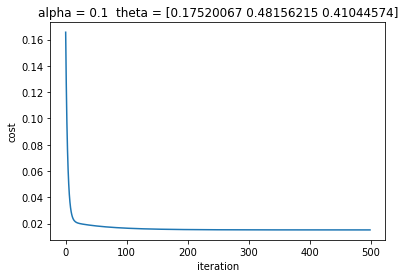

results: 0.15765041322628645 (0.11036394021249946)


In [103]:
performance_parameter(xValues_01,yValues_01, 0.1, 500, satTest_01)

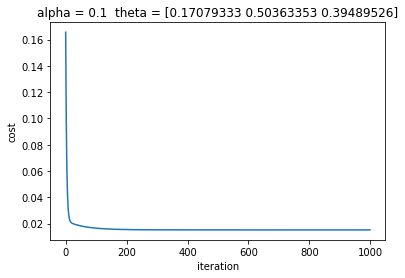

results: 0.17389312822660807 (0.12724231532867075)


In [108]:
performance_parameter(xValues_01,yValues_01, 0.1, 1000, satTest_01)

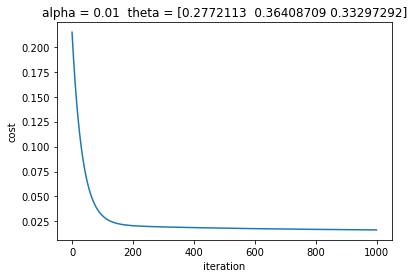

results: 0.15402921196732666 (0.11898681404546743)


In [117]:
# testint alpha
performance_parameter(xValues_01,yValues_01, 0.01, 1000, satTest_01)

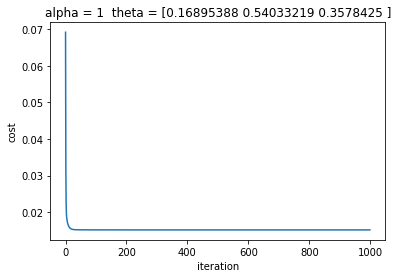

results: 0.1747841038044705 (0.12724146037403825)


In [105]:
performance_parameter(xValues_01,yValues_01, 1, 1000, satTest_01)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in square
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in multiply
D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in subtract


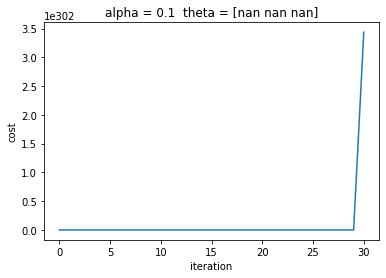

results: nan (nan)


In [120]:
# Testing normalization
performance_parameter(xValues,yValues, 0.1, 1000, satTest)

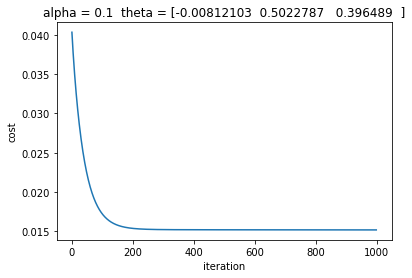

results: 0.17388054904814199 (0.12726573815068282)


In [124]:
performance_parameter(xValues_demean,yValues_demean, 0.1, 1000, satTest_demean)

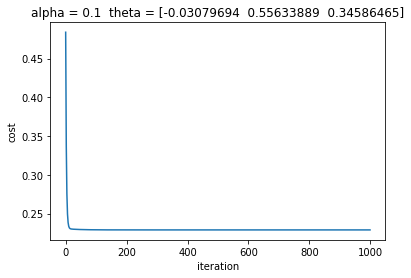

results: 0.6794095300181509 (0.4946037384101878)


In [123]:
performance_parameter(xValues_z,yValues_z, 0.1, 1000, satTest_z)